In [53]:
%pylab inline
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\ylc\anaconda3\envs\companionGLM\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [54]:
file_dir = "D:\my-dev-code\FBDQA-final-project\FBDQA2021A_MMP_Challenge_ver0.2\data"

## 读入单个文件并观察

In [55]:
sym = 8
date = 10

file_name = f"snapshot_sym{sym}_date{date}_am.csv"

In [56]:
df = pd.read_csv(os.path.join(file_dir,file_name))
df

,date,time,sym,n_close,amount_delta,n_midprice,n_bid1,n_bsize1,n_bid2,n_bsize2,...,n_asize3,n_ask4,n_asize4,n_ask5,n_asize5,label_5,label_10,label_20,label_40,label_60
0,10,09:40:03,8,-0.002144,12564.0,-0.001787,-0.002144,0.000006,-0.002859,0.000004,...,0.000001,0.000715,0.000006,0.001430,0.000014,1.0,1.0,1.0,0.0,0.0
1,10,09:40:06,8,-0.001430,2794.0,-0.001787,-0.002144,0.000006,-0.002859,0.000004,...,0.000001,0.000715,0.000006,0.001430,0.000014,1.0,1.0,1.0,0.0,0.0
2,10,09:40:09,8,-0.001430,0.0,-0.001787,-0.002144,0.000006,-0.002859,0.000004,...,0.000001,0.000715,0.000006,0.001430,0.000014,1.0,1.0,1.0,0.0,0.0
3,10,09:40:12,8,-0.001430,0.0,-0.001787,-0.002144,0.000009,-0.002859,0.000010,...,0.000001,0.000715,0.000006,0.001430,0.000014,1.0,1.0,1.0,0.0,0.0
4,10,09:40:15,8,-0.001430,0.0,-0.001787,-0.002144,0.000009,-0.002859,0.000010,...,0.000001,0.000715,0.000006,0.001430,0.000014,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,10,11:19:45,8,-0.006433,0.0,-0.006076,-0.006433,0.000020,-0.007148,0.000007,...,0.000038,-0.003574,0.000040,-0.002859,0.000135,1.0,1.0,1.0,1.0,1.0
1995,10,11:19:48,8,-0.005718,9737.0,-0.006076,-0.006433,0.000020,-0.007148,0.000007,...,0.000038,-0.003574,0.000040,-0.002859,0.000135,1.0,1.0,1.0,1.0,1.0
1996,10,11:19:51,8,-0.005718,0.0,-0.006076,-0.006433,0.000020,-0.007148,0.000007,...,0.000038,-0.003574,0.000040,-0.002859,0.000135,1.0,1.0,1.0,1.0,1.0
1997,10,11:19:54,8,-0.005718,0.0,-0.006076,-0.006433,0.000020,-0.007148,0.000007,...,0.000038,-0.003574,0.000040,-0.002859,0.000135,1.0,1.0,1.0,1.0,1.0


# 检查异常值/缺失值

In [57]:
# 确定有无na值，若有要进行处理（是否一定能用0填充）
df.isnull().values.any()

False

In [58]:
# 确定有无inf值
cols = df.columns
for col in cols:
    # 如果不是object
    if not(df[col].dtypes == 'object'):
        # 判断是否有inf值，有则打印列名
        if not (np.all(np.isfinite(df[col].values))):
            print(col)

In [59]:
df.describe()

,date,sym,n_close,amount_delta,n_midprice,n_bid1,n_bsize1,n_bid2,n_bsize2,n_bid3,...,n_asize3,n_ask4,n_asize4,n_ask5,n_asize5,label_5,label_10,label_20,label_40,label_60
count,1999.0,1999.0,1999.000000,1999.000000,1999.000000,1999.000000,1.999000e+03,1999.000000,1.999000e+03,1999.000000,...,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,10.0,8.0,-0.006120,15733.069035,-0.006234,-0.006630,2.099002e-05,-0.007368,2.871879e-05,-0.008121,...,3.353351e-05,-0.003597,0.000033,-0.002875,0.000056,0.986993,0.975488,0.974987,0.962481,0.942971
std,0.0,0.0,0.002328,60298.128542,0.002280,0.002251,1.685327e-05,0.002218,2.277016e-05,0.002243,...,2.924121e-05,0.002385,0.000023,0.002388,0.000053,0.447248,0.552453,0.336880,0.458588,0.509911
min,10.0,8.0,-0.010722,0.000000,-0.011079,-0.011437,1.288244e-07,-0.012152,1.288244e-07,-0.012866,...,1.288244e-07,-0.007863,0.000001,-0.007148,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.0,8.0,-0.007148,0.000000,-0.007505,-0.007863,7.600641e-06,-0.008578,1.017713e-05,-0.009292,...,1.726247e-05,-0.005004,0.000017,-0.004289,0.000021,1.000000,1.000000,1.000000,1.000000,1.000000
50%,10.0,8.0,-0.006433,0.000000,-0.006791,-0.007148,1.623188e-05,-0.007863,2.473429e-05,-0.008578,...,2.653783e-05,-0.004289,0.000032,-0.003574,0.000033,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.0,8.0,-0.005718,4164.000000,-0.006076,-0.006433,3.085345e-05,-0.007148,3.684378e-05,-0.007863,...,3.774555e-05,-0.003574,0.000040,-0.002859,0.000065,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0,8.0,0.000000,899012.000000,-0.000357,-0.000715,9.855068e-05,-0.001430,9.855068e-05,-0.002144,...,1.589307e-04,0.002144,0.000159,0.002859,0.000160,2.000000,2.000000,2.000000,2.000000,2.000000


In [60]:
## 当数量级不一致时，很有可能影响后续计算结果
print(1e-10 + 1.0 == 1.0)
print(1e-20 + 1.0 == 1.0)
## 譬如上图的amount_delta

False
True


## 画图观察

<Axes: >

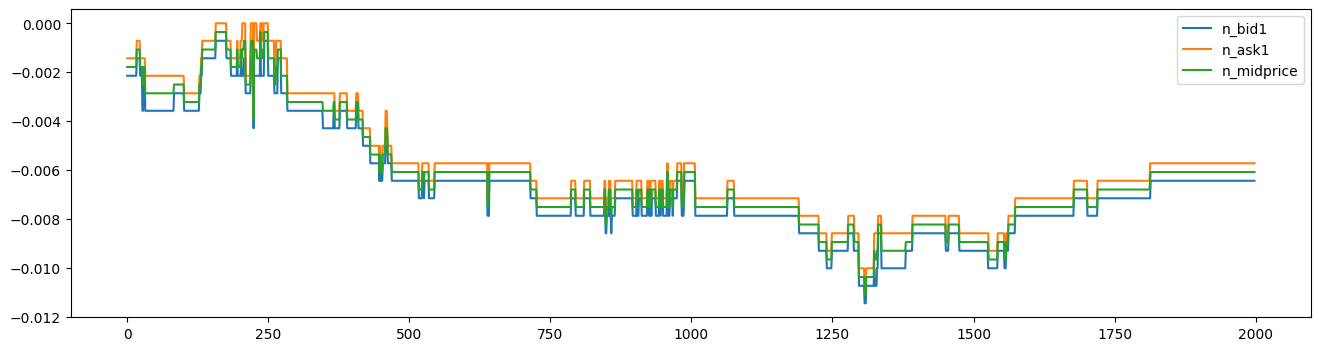

In [61]:
df[['n_bid1','n_ask1','n_midprice']].plot(figsize = (16,4))


<Axes: >

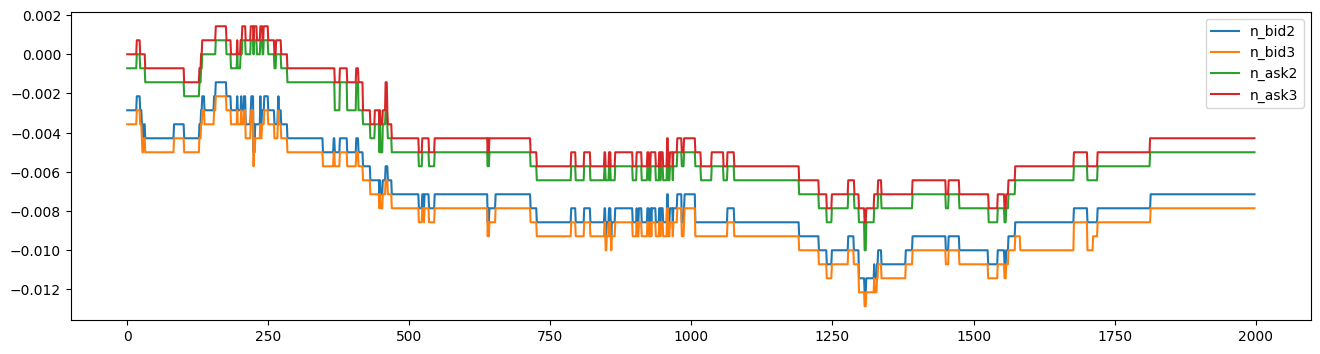

In [62]:
df[['n_bid2','n_bid3','n_ask2','n_ask3']].plot(figsize = (16,4))

Text(0.5, 1.0, 'price_label')

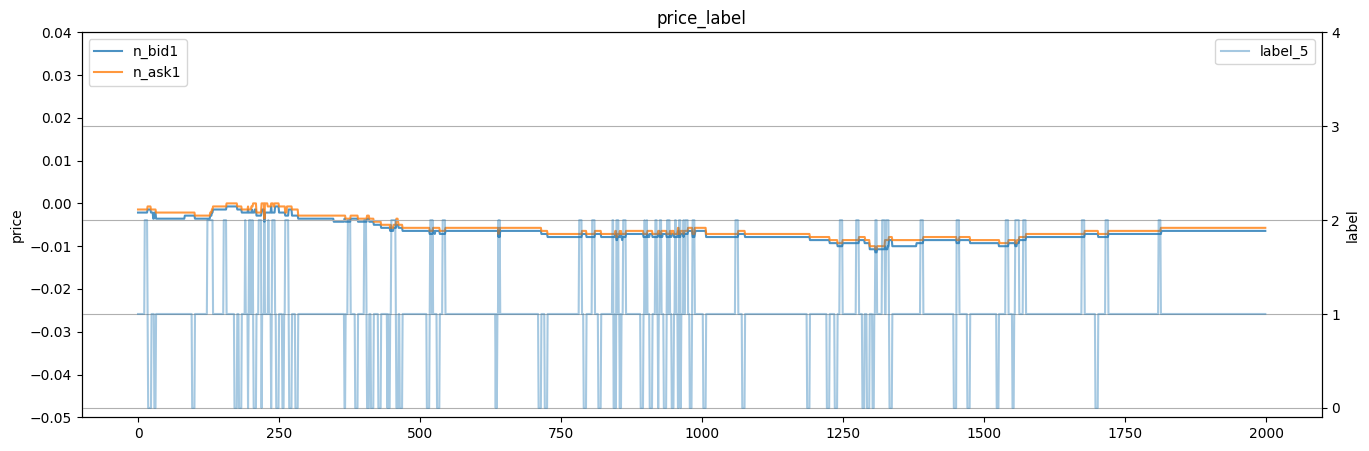

In [63]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['n_bid1','n_ask1']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.05,0.05,0.01))       
ax1.set_ylabel('price') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['label_5']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,5,1))
ax2.set_ylabel('label')    
plt.legend(loc=1)   

plt.title('price_label')

<Axes: >

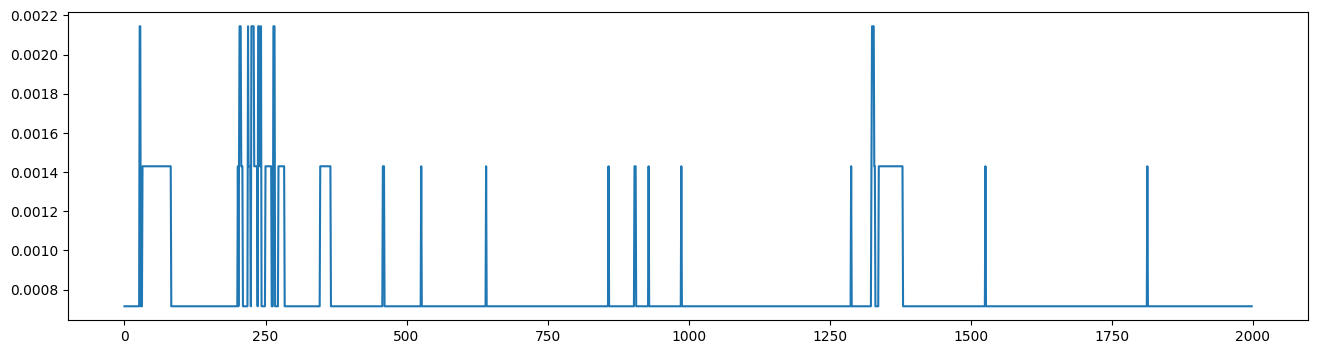

In [64]:
df['spread'] = df['n_ask1'] - df['n_bid1']
df['spread'].plot(figsize = (16,4))

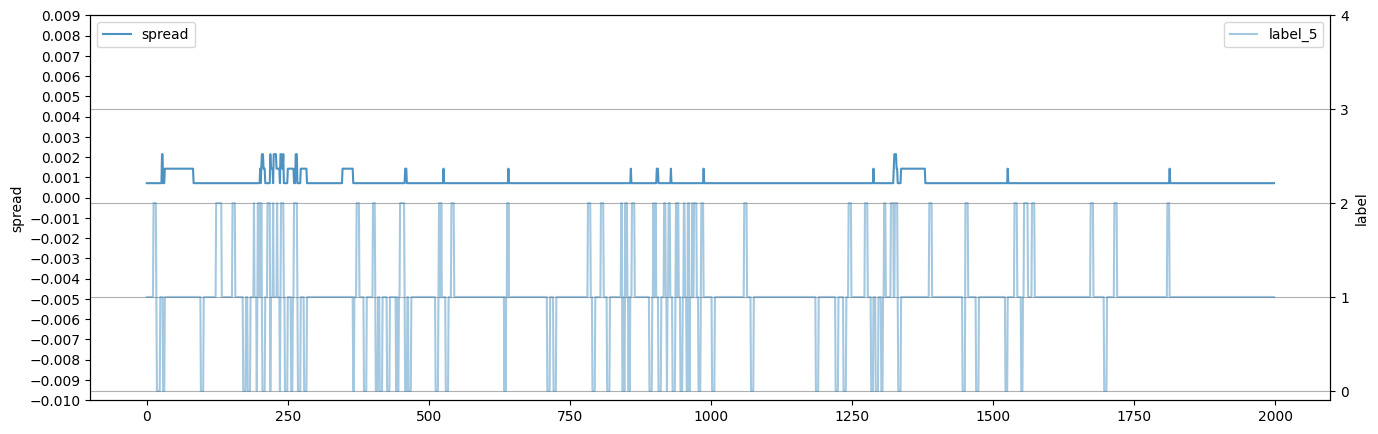

In [65]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['spread']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.01,0.01,0.001))       
ax1.set_ylabel('spread') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['label_5']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,5,1))
ax2.set_ylabel('label')    
plt.legend(loc=1)   

In [66]:
df['adj_label_5'] = df['label_5'].copy()
df.loc[df['label_5']==2,'adj_label_5'] = 0

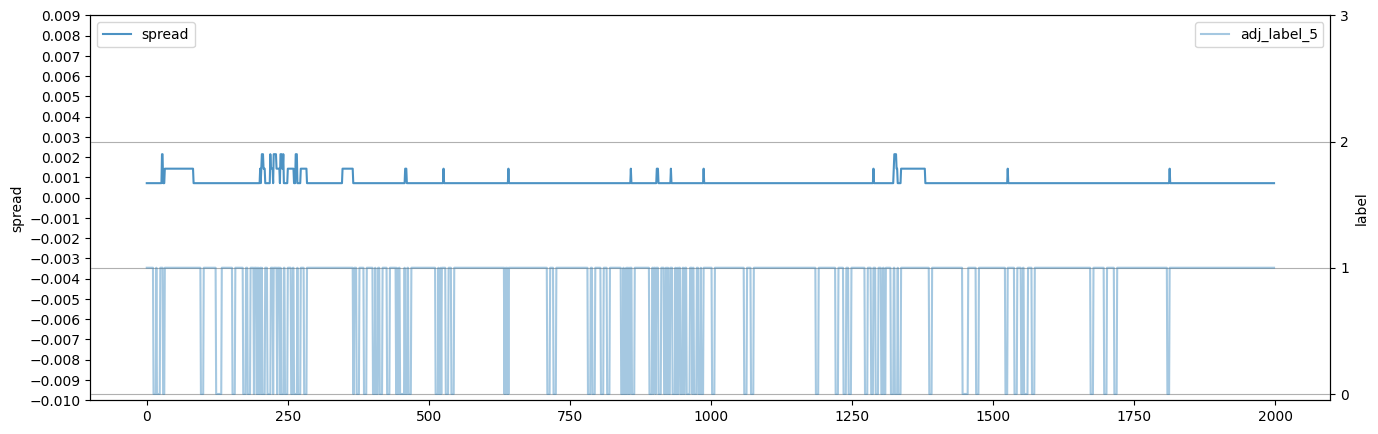

In [67]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['spread']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.01,0.01,0.001))       
ax1.set_ylabel('spread') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['adj_label_5']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,4,1))
ax2.set_ylabel('label')    
plt.legend(loc=1)   

## size变化过大不好处理：log

In [71]:
df[['n_bsize1','n_asize1', 'n_bid1', 'n_ask1','amount_delta', 'n_midprice']].describe()

,n_bsize1,n_asize1,n_bid1,n_ask1,amount_delta,n_midprice
count,1.999000e+03,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000
mean,2.099002e-05,3.455410e-05,-0.006630,-0.005839,15733.069035,-0.006234
std,1.685327e-05,4.179539e-05,0.002251,0.002315,60298.128542,0.002280
min,1.288244e-07,1.288244e-07,-0.011437,-0.010722,0.000000,-0.011079
25%,7.600641e-06,8.115938e-06,-0.007863,-0.007148,0.000000,-0.007505
50%,1.623188e-05,2.099838e-05,-0.007148,-0.006433,0.000000,-0.006791
75%,3.085345e-05,3.774555e-05,-0.006433,-0.005718,4164.000000,-0.006076
max,9.855068e-05,1.998969e-04,-0.000715,0.000000,899012.000000,-0.000357


In [69]:
# 写个for循环更好，这里只是为了表达清晰
df['bsize1'] = df['n_bsize1'].map(lambda x: np.log1p(x * 100000))    # 为什么要用log1p？
df['bsize2'] = df['n_bsize2'].map(lambda x: np.log1p(x * 100000))
df['asize1'] = df['n_asize1'].map(lambda x: np.log1p(x * 100000))
df['asize2'] = df['n_asize2'].map(lambda x: np.log1p(x * 100000))
df['amount'] = df['amount_delta'].map(np.log1p)

df[['bsize1','n_bsize1','bsize2','n_bsize1','asize1','n_asize1','asize2','n_asize2','amount','amount_delta']].describe()


,bsize1,n_bsize1,bsize2,n_bsize1,asize1,n_asize1,asize2,n_asize2,amount,amount_delta
count,1999.000000,1.999000e+03,1999.000000,1.999000e+03,1999.000000,1.999000e+03,1999.000000,1.999000e+03,1999.000000,1999.000000
mean,0.991059,2.099002e-05,1.198502,2.099002e-05,1.175877,3.455410e-05,1.169811,3.045138e-05,3.278887,15733.069035
std,0.529975,1.685327e-05,0.557108,1.685327e-05,0.762629,4.179539e-05,0.664617,3.013001e-05,4.594543,60298.128542
min,0.012800,1.288244e-07,0.012800,1.288244e-07,0.012800,1.288244e-07,0.012800,1.288244e-07,0.000000,0.000000
25%,0.565350,7.600641e-06,0.701965,7.600641e-06,0.594207,8.115938e-06,0.587071,7.987114e-06,0.000000,0.000000
50%,0.964390,1.623188e-05,1.245142,1.623188e-05,1.131350,2.099838e-05,1.248844,2.486311e-05,0.000000,0.000000
75%,1.407405,3.085345e-05,1.544233,3.085345e-05,1.563301,3.774555e-05,1.541479,3.671496e-05,8.334472,4164.000000
max,2.384632,9.855068e-05,2.384632,9.855068e-05,3.044031,1.998969e-04,2.842040,1.615072e-04,13.709053,899012.000000


# 查看取对数后的数据分布

Text(0.5, 1.0, 'price_vol')

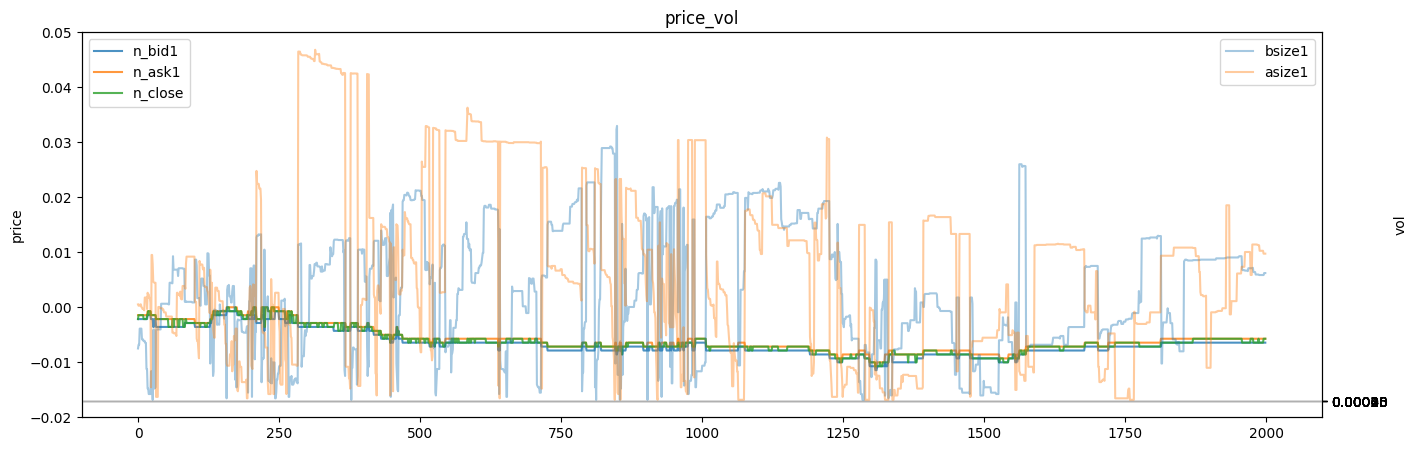

In [70]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['n_bid1','n_ask1','n_close']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.02,0.05,0.01))       
ax1.set_ylabel('price') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['bsize1','asize1']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,0.0005,0.00005))
ax2.set_ylabel('vol')    
plt.legend(loc=1)   

plt.title('price_vol')
# plt.savefig('price_vol.png', dpi=400, bbox_inches='tight')     